In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

meat = pd.read_csv('Resources/meat_consumption.csv')
meat.head()

,year,beef,lamb,pork,chicken
0,1974,63,25,10,12
1,1975,67,22,10,13
2,1976,69,18,10,14
3,1977,67,18,11,15
4,1978,57,18,10,17


In [3]:
# Assign the data to X and y

y = meat[["beef", "lamb", "pork", "chicken"]]
X = meat["year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(44, 1) (44, 4)


In [4]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### END SOLUTION

In [5]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [6]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8691371723873892
Testing Score: 0.8369623634877369


Text(0.5, 1.0, 'Residual Plot')

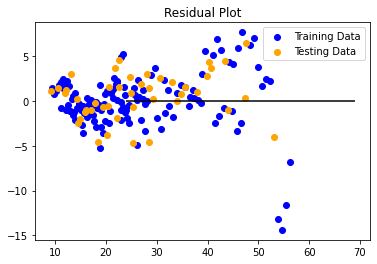

In [7]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [8]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-0.79181857]
 [-0.34574825]
 [ 0.39483572]
 [ 0.8411297 ]]
y-axis intercept:  [ 1619.23600456   706.46504775  -767.93163875 -1649.17892129]


In [9]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1974]]
Max X Value: [[2017]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict([[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027]])
### END SOLUTION
y_max

array([[21.34613406,  8.74507951, 28.84684977, 48.22081255],
       [20.55431549,  8.39933126, 29.24168549, 49.06194225],
       [19.76249692,  8.05358301, 29.63652121, 49.90307195],
       [18.97067836,  7.70783476, 30.03135694, 50.74420165],
       [18.17885979,  7.36208651, 30.42619266, 51.58533135],
       [17.38704122,  7.01633826, 30.82102838, 52.42646105],
       [16.59522265,  6.67059001, 31.21586411, 53.26759075],
       [15.80340408,  6.32484176, 31.61069983, 54.10872045],
       [15.01158552,  5.97909351, 32.00553555, 54.94985015],
       [14.21976695,  5.63334526, 32.40037127, 55.79097985]])

In [11]:
# transform the predicted array to a dataframe
predicted_df = pd.DataFrame(y_max)
predicted_df.head()

,0,1,2,3
0,21.346134,8.745080,28.846850,48.220813
1,20.554315,8.399331,29.241685,49.061942
2,19.762497,8.053583,29.636521,49.903072
3,18.970678,7.707835,30.031357,50.744202
4,18.178860,7.362087,30.426193,51.585331


In [12]:
# include a column with years
predicted_df ['year'] = [2018,2019,2020,2021,2022,2023,2024,2025,2026,2027]
predicted_df

,0,1,2,3,year
0,21.346134,8.745080,28.846850,48.220813,2018
1,20.554315,8.399331,29.241685,49.061942,2019
2,19.762497,8.053583,29.636521,49.903072,2020
3,18.970678,7.707835,30.031357,50.744202,2021
4,18.178860,7.362087,30.426193,51.585331,2022
5,17.387041,7.016338,30.821028,52.426461,2023
6,16.595223,6.670590,31.215864,53.267591,2024
7,15.803404,6.324842,31.610700,54.108720,2025
8,15.011586,5.979094,32.005536,54.949850,2026
9,14.219767,5.633345,32.400371,55.790980,2027


In [13]:
# move year column to be the first row of the dataframe
first_col = predicted_df.pop("year")
predicted_df.insert(0, "year", first_col)
predicted_df

,year,0,1,2,3
0,2018,21.346134,8.745080,28.846850,48.220813
1,2019,20.554315,8.399331,29.241685,49.061942
2,2020,19.762497,8.053583,29.636521,49.903072
3,2021,18.970678,7.707835,30.031357,50.744202
4,2022,18.178860,7.362087,30.426193,51.585331
5,2023,17.387041,7.016338,30.821028,52.426461
6,2024,16.595223,6.670590,31.215864,53.267591
7,2025,15.803404,6.324842,31.610700,54.108720
8,2026,15.011586,5.979094,32.005536,54.949850
9,2027,14.219767,5.633345,32.400371,55.790980


In [14]:
# Rename the column headers
predicted_df = predicted_df.rename(columns={0: "beef",
                                                          1: "lamb",
                                                          2:"pork",
                                                          3: "chicken"})
predicted_df

,year,beef,lamb,pork,chicken
0,2018,21.346134,8.745080,28.846850,48.220813
1,2019,20.554315,8.399331,29.241685,49.061942
2,2020,19.762497,8.053583,29.636521,49.903072
3,2021,18.970678,7.707835,30.031357,50.744202
4,2022,18.178860,7.362087,30.426193,51.585331
5,2023,17.387041,7.016338,30.821028,52.426461
6,2024,16.595223,6.670590,31.215864,53.267591
7,2025,15.803404,6.324842,31.610700,54.108720
8,2026,15.011586,5.979094,32.005536,54.949850
9,2027,14.219767,5.633345,32.400371,55.790980


In [15]:
# save predcited data to resources folder as a CSV
predicted_df.to_csv('Resources/predicted_meat_consumption.csv',index = False, header=True)